In [1]:
from sklearn import manifold
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gudhi
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def read_data(book):
    data = pd.read_csv('./distances/' + f'{book}.csv')
    data = np.array(data)

    names = list(data[:, 0])
    data= data[:, 1:]
    
    return data, names

In [13]:
def draw_simplicial_complex(book, data, threshold):
    rips_complex = gudhi.RipsComplex(distance_matrix = data, max_edge_length = threshold)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    
    vertices = np.array([s[0] for s in simplex_tree.get_skeleton(0) if len(s[0]) == 1])
    edges = np.array([s[0] for s in simplex_tree.get_skeleton(1) if len(s[0]) == 2])
    triangles = np.array([s[0] for s in simplex_tree.get_skeleton(2) if len(s[0]) == 3])
    
    # make 3D coords
    mds = manifold.MDS(n_components=3, dissimilarity="precomputed", random_state=42)
    coordinates = mds.fit_transform(data)
    
    x = coordinates[:, 0]
    y = coordinates[:, 1]
    z = coordinates[:, 2]
    
    
    %matplotlib notebook 
    
    # create a 3D figure
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    
    # plot 3D points and label them
    plt.scatter(x, y, z)
    for i, name in enumerate(names):
        ax.text(x[i], y[i], z[i], name)
        
    # add edges
    if len(edges) != 0:
        for i in range(len(edges)):
            ax.plot(x[edges[i, :]], y[edges[i, :]], z[edges[i, :]])
    
    # plot triangles
    if len(triangles) != 0:
        ax.plot_trisurf(x, y, z, triangles=triangles)    
        
    ax.set_title(f'{book}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    plt.show()

C:\Users\Milica\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


<IPython.core.display.Javascript object>


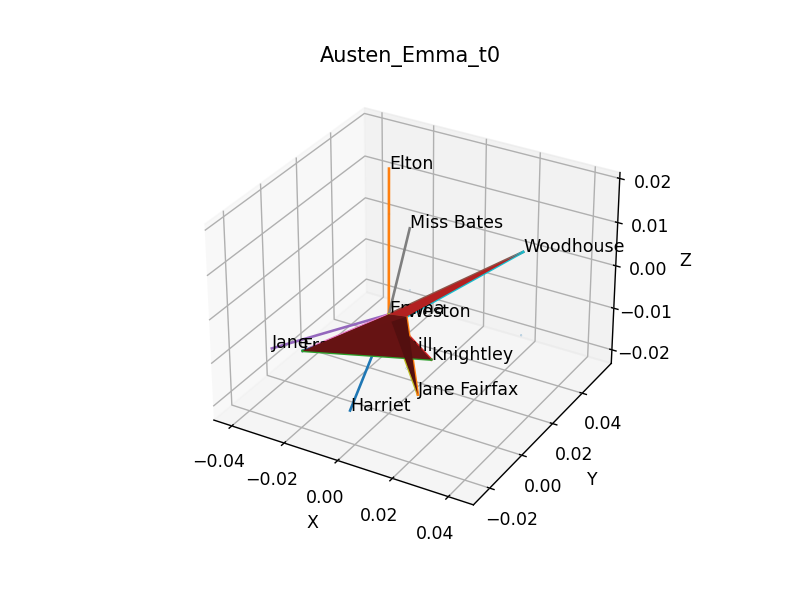

C:\Users\Milica\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


In [14]:
book = 'Austen_Emma_t0'
data, names = read_data(book)
draw_simplicial_complex(book, data, 0.012)